In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base() 
# reflect the tables
Base.prepare(engine, reflect=True) 


In [8]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station 

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine) 


# Exploratory Climate Analysis

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

first_date = session.query(measurement.date).order_by(measurement.date.desc()).first()



In [13]:
# Calculate the date 1 year ago from the last data point in the database

past_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [14]:
# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > past_date).\
    order_by(measurement.date).all()


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_data_df = pd.DataFrame(precipitation_data)
precipitation_data_df.head()



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


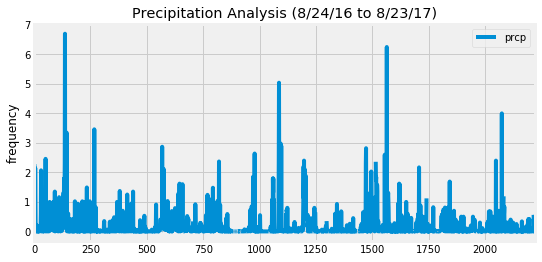

In [16]:

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


ax = precipitation_data_df.plot(figsize=(8,4))
ax.set_title("Precipitation Analysis (8/24/16 to 8/23/17)")
ax.set_ylabel('frequency')
plt.show()

In [18]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(measurement).group_by(measurement.station).count()
locations

9

In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?

observations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).\
               order_by(func.count(measurement.tobs).desc()).all()

most_active = observations[0][0]    
most_active

'USC00519281'

In [22]:


# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).\
               order_by(func.count(measurement.tobs).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == most_active).all()


[(54.0, 71.66378066378067, 85.0)]

<function matplotlib.pyplot.show(*args, **kw)>

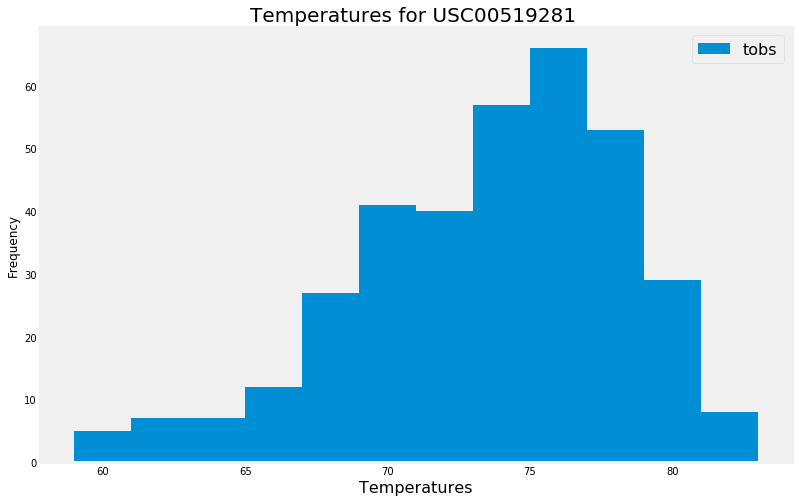

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == most_active).\
                filter(measurement.date >= past_date).all()
tobs_df = pd.DataFrame(results)
tobs_df.set_index('station', inplace=True)

# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperatures for USC00519281 ", fontsize=20)
plt.xlabel("Temperatures", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
